In [11]:
import pandas as pd
import numpy as np

In [ ]:
btc = pd.read_csv("data/BTC_1H.csv", parse_dates=["timestamp"]).rename(columns={"close": "close_BTC"})
eth = pd.read_csv("data/ETH_1H.csv", parse_dates=["timestamp"]).rename(columns={"close": "close_ETH"})
sol = pd.read_csv("data/SOL_1H.csv", parse_dates=["timestamp"]).rename(columns={"close": "close_SOL"})
ltc = pd.read_csv("data/LTC_1H.csv", parse_dates=["timestamp"])



In [13]:
anchor = pd.merge(
    btc[["timestamp", "close_BTC"]],
    eth[["timestamp", "close_ETH"]],
    on="timestamp", how="inner"
)



In [14]:

ltc["usd_volume"] = ltc["close"] * ltc["volume"]
ltc = ltc[ltc["timestamp"] < "2025-05-09"]
daily = ltc.set_index("timestamp")["usd_volume"].resample("D").sum()
print("Avg daily USD volume:", daily.mean())


Avg daily USD volume: 104179578.40720329


##Eligibility of LTC confirmed

In [15]:
from strategy2 import generate_signals
from backtest import backtest_signals

In [16]:
signals = generate_signals(ltc, anchor)
print(signals['signal'].value_counts())

print(signals.columns)



signal
HOLD    745
BUY      12
SELL     11
Name: count, dtype: int64
Index(['timestamp', 'signal'], dtype='object')


In [17]:
results_df, metrics = backtest_signals(signals, ltc)


In [18]:
print(metrics)

{'final_capital': np.float64(1088.64), 'final_return_pct': np.float64(8.86), 'sharpe_ratio': np.float64(0.0181), 'max_drawdown_pct': np.float64(15.03)}


In [19]:
results_df[results_df["signal"] != "HOLD"].head(20)


,timestamp,signal,close,position,cash,holdings,capital,returns
58,2025-01-10 16:00:00,SELL,106.10,0,1000.000000,0.000000,1000.000000,0.000000
63,2025-01-11 12:00:00,BUY,103.25,0,0.000000,9.675545,999.000000,-0.001000
70,2025-01-12 16:00:00,BUY,103.92,0,0.000000,9.675545,1005.482615,0.010305
72,2025-01-13 00:00:00,SELL,100.60,0,972.386446,0.000000,972.386446,-0.017985
359,2025-03-01 20:00:00,BUY,124.31,0,0.000000,7.814448,971.414060,-0.001000
364,2025-03-02 16:00:00,SELL,126.46,0,987.226909,0.000000,987.226909,0.040296
406,2025-03-09 16:00:00,SELL,97.31,0,987.226909,0.000000,987.226909,0.000000
411,2025-03-10 12:00:00,BUY,92.91,0,0.000000,10.615000,986.239682,-0.001000
532,2025-03-30 16:00:00,SELL,86.40,0,916.218893,0.000000,916.218893,-0.001347
537,2025-03-31 12:00:00,BUY,83.22,0,0.000000,10.998590,915.302675,-0.001000


<Axes: title={'center': 'Capital Curve'}>

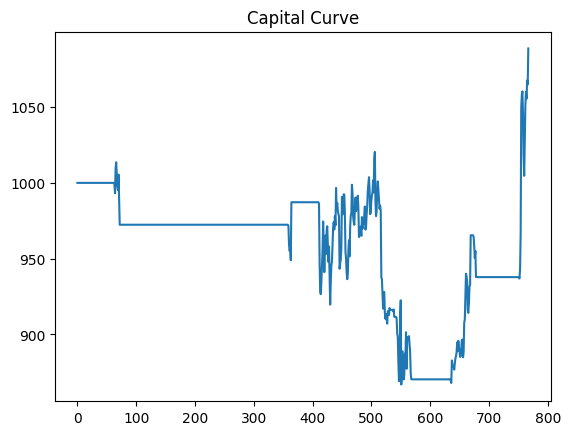

In [20]:
from matplotlib import pyplot
results_df["capital"].plot(title="Capital Curve")
